In [370]:
import numpy as np
import pandas as pd
import random as rd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [372]:
def ACF_PACF(laggedData):
    ACF = []
    PACF = []

    for i in range(10):
        ACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])
        if i > 1:
            y = pd.DataFrame(laggedData[0])
            X = pd.DataFrame(laggedData.loc[:,1:i-1])
            lm = linear_model.LinearRegression()
            lm.fit(X,y)
            df1 = tempSeries[0:100] 
            for j in range(lm.coef_.size):
                df1 = df1 - lm.coef_[0][j]*laggedData[j+1]

            PACF.append(np.corrcoef(df1,laggedData[i])[0][1])
        else:
            PACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])
            
    df2 = pd.concat([pd.DataFrame(ACF),pd.DataFrame(PACF)], axis=1)
    
    return df2

In [373]:
def getACFPACF(time,timeSeries):
    pl = plt.plot(time, series)
    
    return pl

In [375]:
seed = 42

np.random.seed(seed)


# Create the time array
time = np.arange(0,100,1)

# Create white noise array
noise = np.random.normal(loc=0.0, scale=6.0, size=100)

# Create time series data
series = np.array([4,2])
for i in range(2,100):
    l = 0.5*series[i-1] + 0.3*series[i-2] + noise[i]
    series = np.append(series,l)

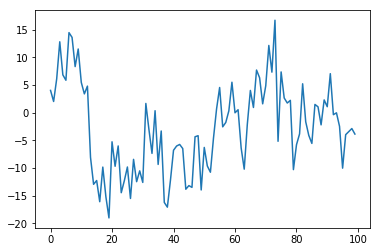

In [376]:
getACFPACF(time,series)

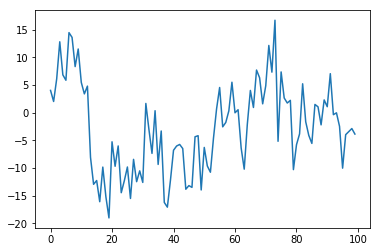

In [359]:
# Plot the time series data
plt.plot(time, series)

In [360]:
tempSeries = np.append(series,series)

In [361]:
# Get the ACF for 10 lags
ACF = []

for i in range(10):
    ACF.append(np.corrcoef(tempSeries[0:100],tempSeries[1+i:101+i])[0][1])

<Container object of 10 artists>

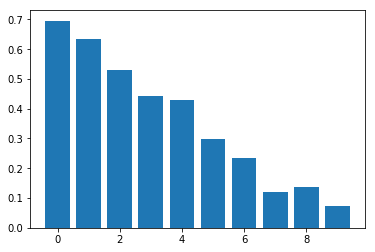

In [362]:
plt.bar(range(10), ACF)

In [363]:
# X = pd.DataFrame(tempSeries[0:100])

# for i in range(9):
#     X = pd.concat([X,pd.DataFrame(tempSeries[1+i:101+i])],axis=1)

In [364]:
dic = {i:tempSeries[0+i:100+i] for i in range(10)}
laggedData = pd.DataFrame(dic)

In [365]:
# Get the PACF for 10 lags
PACF = []

for i in range(10):
    if i > 1:
        y = pd.DataFrame(laggedData[0])
        X = pd.DataFrame(laggedData.loc[:,1:i-1])
        lm = linear_model.LinearRegression()
        lm.fit(X,y)
        df1 = tempSeries[0:100] 
        for j in range(lm.coef_.size):
            df1 = df1 - lm.coef_[0][j]*laggedData[j+1]
            
        PACF.append(np.corrcoef(df1,laggedData[i])[0][1])
    else:
        PACF.append(np.corrcoef(laggedData[0],laggedData[i])[0][1])

<Container object of 10 artists>

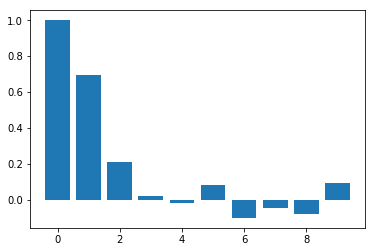

In [367]:
plt.bar(range(10),PACF)

In [368]:
d = ACF_PACF(laggedData)

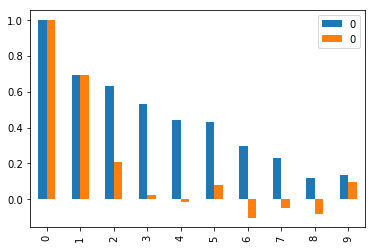

In [369]:
d.plot(kind='bar')